In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
data = '/home/joe/data/covid19/summary'
#data = '/run/user/1000/gvfs/smb-share:server=majesty.local,share=filesjoe/data/summary'
df = pd.read_csv(data)

df = df.astype({'country':'string','cases':'int32', 'deaths':'int32'})
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.sort_values(by=['date'])
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [3]:
df.head()

,date,country,cases,deaths
0,2020-01-27,china,2741,80
1,2020-01-28,china,4537,106
2,2020-01-29,china,5997,132
3,2020-01-30,china,7736,170
4,2020-01-31,china,9720,213


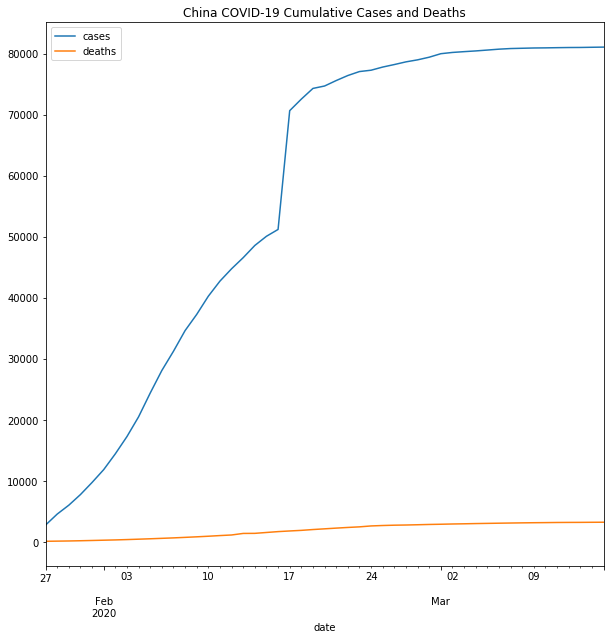

In [4]:
df.plot(x='date',y=['cases','deaths'],kind='line',
        figsize=(10,10),title="China COVID-19 Cumulative Cases and Deaths")


Text(0, 0.5, 'cumulative deaths')

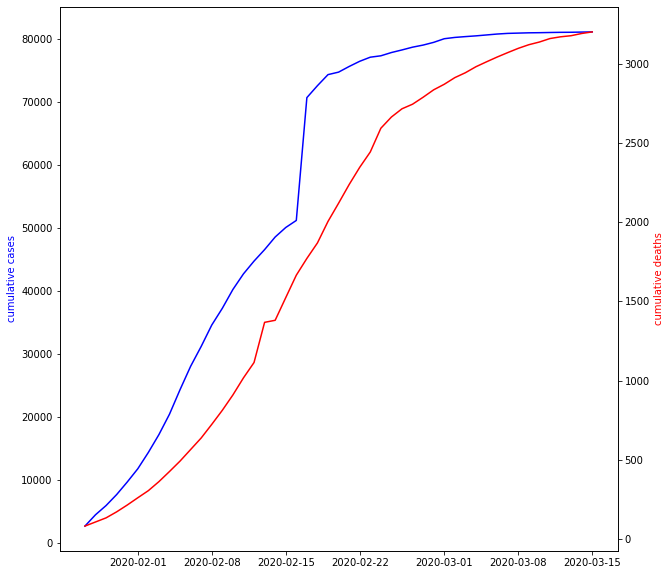

In [17]:
fig = plt.figure()
fig.set_size_inches(10,10)

ax1 = fig.add_subplot(111)
ax1.plot(df['date'],df['cases'], color='b')
ax1.set_ylabel('cumulative cases', color='b')

ax2 = ax1.twinx()
ax2.plot(df['date'],df['deaths'],'r')
ax2.set_ylabel('cumulative deaths', color='r')

In [6]:
df.corr()

,cases,deaths
cases,1.000000,0.969542
deaths,0.969542,1.000000


In [7]:
df['mortality'] = df.apply(lambda row: row.deaths/row.cases, axis = 1) 

df.head()

,date,country,cases,deaths,mortality
0,2020-01-27,china,2741,80,0.029186
1,2020-01-28,china,4537,106,0.023363
2,2020-01-29,china,5997,132,0.022011
3,2020-01-30,china,7736,170,0.021975
4,2020-01-31,china,9720,213,0.021914


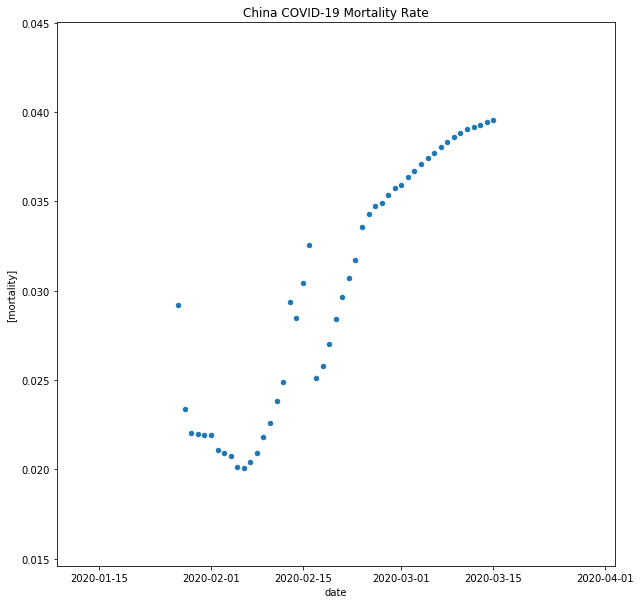

In [8]:
df.plot(x='date',y=['mortality'],kind='scatter',
        figsize=(10,10),title="China COVID-19 Mortality Rate")


In [13]:
df['new cases'] = df.cases - df.cases.shift(1)
df['new deaths'] = df.deaths - df.deaths.shift(1)
#df = df.fillna(0)
df

,date,country,cases,deaths,mortality,new cases,new deaths
0,2020-01-27,china,2741,80,0.029186,NaN,NaN
1,2020-01-28,china,4537,106,0.023363,1796.0,26.0
2,2020-01-29,china,5997,132,0.022011,1460.0,26.0
3,2020-01-30,china,7736,170,0.021975,1739.0,38.0
4,2020-01-31,china,9720,213,0.021914,1984.0,43.0
5,2020-02-01,china,11821,259,0.021910,2101.0,46.0
6,2020-02-02,china,14411,304,0.021095,2590.0,45.0
7,2020-02-03,china,17238,361,0.020942,2827.0,57.0
8,2020-02-04,china,20471,425,0.020761,3233.0,64.0
9,2020-02-05,china,24363,491,0.020154,3892.0,66.0


Text(0, 0.5, 'new deaths')

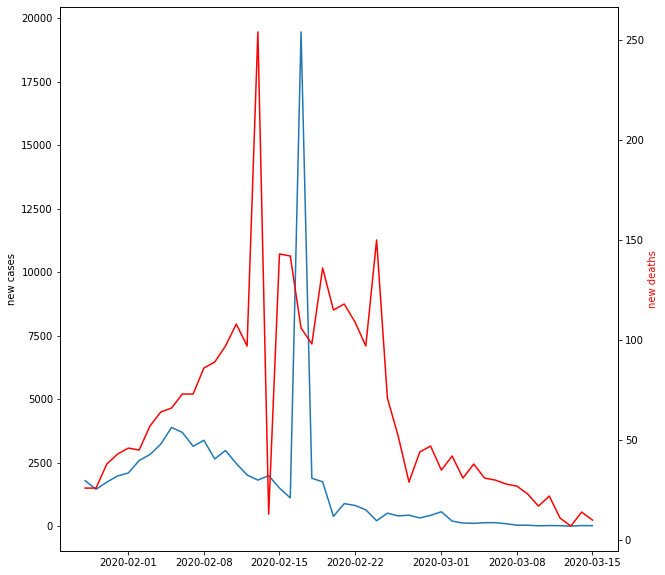

In [14]:
figB = plt.figure()
figB.set_size_inches(10,10)

axB1 = figB.add_subplot(111)
axB1.plot(df['date'],df['new cases'], color='b')
axB1.set_ylabel('new cases', color='b')

axB2 = axB1.twinx()
axB2.plot(df['date'],df['new deaths'], color='r')
axB2.set_ylabel('new deaths', color='r')